In [306]:
#Importing necessary packages
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib 
from matplotlib import pylab as plt

In [307]:
#Reading in CSV file
og_df = pd.read_csv('/Users/maxboucher/Desktop/Data Science Project/Airbnb Booking/data/airbnb.csv')
og_df.head()

,id_visitor,id_session,dim_session_number,dim_user_agent,dim_device_app_combo,ds,ts_min,ts_max,did_search,sent_message,...,next_id_session,next_dim_session_number,next_dim_user_agent,next_dim_device_app_combo,next_ds,next_ts_min,next_ts_max,next_did_search,next_sent_message,next_sent_booking_request
0,ed1329a6-064d-47e9-93bc-93f5a50822df,a8dfb8ed5aa79e00ff14b2da297c9778,83,Airbnb/6.0 iPhone/8.1.2,iPhone - iOS,2/16/15,2/16/15 21:50,2/16/15 22:13,0,0,...,b812bf56bf89b0b31f4e5b50d0c15ff8,84.0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2/18/15,2/18/15 11:57,2/18/15 12:12,0.0,0.0,0.0
1,ed1329a6-064d-47e9-93bc-93f5a50822df,950277daef16f86dc2c05d2b212eea81,84,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2/18/15,2/18/15 11:57,2/18/15 12:12,0,0,...,456083b5f5506ad125d595006819de1d,85.0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2/18/15,2/18/15 13:02,2/18/15 13:05,0.0,0.0,0.0
2,ed1329a6-064d-47e9-93bc-93f5a50822df,ee4e2f99dd0c0bef2d40e4bdf880c862,85,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2/18/15,2/18/15 13:02,2/18/15 13:05,0,0,...,94d30e9f3c8f92ae691e49d77a884777,86.0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2/18/15,2/18/15 14:18,2/18/15 14:28,0.0,0.0,0.0
3,ed1329a6-064d-47e9-93bc-93f5a50822df,59fbde7b5d35403116c461fa7fc1ab6e,86,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2/18/15,2/18/15 14:18,2/18/15 14:28,0,0,...,ab02139dc81bea4b126cf5043faf53d9,87.0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2/19/15,2/19/15 12:24,2/19/15 12:24,0.0,0.0,0.0
4,ed1329a6-064d-47e9-93bc-93f5a50822df,ec8972a3c7256ea4dcba61ee2bd9e3a8,87,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2/19/15,2/19/15 12:24,2/19/15 12:24,0,0,...,6a69db1a5876e9798947f20e2c52bcc8,88.0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2/19/15,2/19/15 22:21,2/19/15 22:22,0.0,0.0,0.0


In [308]:
og_df.shape

(7756, 21)

In [309]:
#Creating new dataframe after realizing that all the "next..." variables contain the same data as the following row as well as remove unecessary columnc for model
df = og_df.drop(['next_id_session', 'next_dim_session_number', 'next_dim_user_agent', 'next_dim_device_app_combo',
                      'next_ds', 'next_ts_min', 'next_ts_max', 'next_did_search', 'next_sent_message', 'next_sent_booking_request', 'dim_user_agent'], axis=1)
df.head()

,id_visitor,id_session,dim_session_number,dim_device_app_combo,ds,ts_min,ts_max,did_search,sent_message,sent_booking_request
0,ed1329a6-064d-47e9-93bc-93f5a50822df,a8dfb8ed5aa79e00ff14b2da297c9778,83,iPhone - iOS,2/16/15,2/16/15 21:50,2/16/15 22:13,0,0,0
1,ed1329a6-064d-47e9-93bc-93f5a50822df,950277daef16f86dc2c05d2b212eea81,84,Desktop - Chrome,2/18/15,2/18/15 11:57,2/18/15 12:12,0,0,0
2,ed1329a6-064d-47e9-93bc-93f5a50822df,ee4e2f99dd0c0bef2d40e4bdf880c862,85,Desktop - Chrome,2/18/15,2/18/15 13:02,2/18/15 13:05,0,0,0
3,ed1329a6-064d-47e9-93bc-93f5a50822df,59fbde7b5d35403116c461fa7fc1ab6e,86,Desktop - Chrome,2/18/15,2/18/15 14:18,2/18/15 14:28,0,0,0
4,ed1329a6-064d-47e9-93bc-93f5a50822df,ec8972a3c7256ea4dcba61ee2bd9e3a8,87,Desktop - Chrome,2/19/15,2/19/15 12:24,2/19/15 12:24,0,0,0


In [310]:
# Creating a Session Length variable that measures the time they spend on Airbnb in minutes

# Convert 'ts_min' and 'ts_max' to datetime objects
df['ts_min'] = pd.to_datetime(df['ts_min'], format='%m/%d/%y %H:%M')
df['ts_max'] = pd.to_datetime(df['ts_max'], format='%m/%d/%y %H:%M')

# Calculate session length in minutes
df['session_length'] = (df['ts_max'] - df['ts_min']).dt.total_seconds() / 60

#removing "ts_max" and "ts_min" values as they are no longer needed
# NOTE TO REMOVE DATE VARIABLE LATER
df = df.drop(['ts_max','ts_min'], axis=1)

In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7756 entries, 0 to 7755
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_visitor            7756 non-null   object 
 1   id_session            7756 non-null   object 
 2   dim_session_number    7756 non-null   int64  
 3   dim_device_app_combo  7756 non-null   object 
 4   ds                    7756 non-null   object 
 5   did_search            7756 non-null   int64  
 6   sent_message          7756 non-null   int64  
 7   sent_booking_request  7756 non-null   int64  
 8   session_length        7756 non-null   float64
dtypes: float64(1), int64(4), object(4)
memory usage: 545.5+ KB


In [312]:
#Getting a better understanding of numeric variables
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,dim_session_number,did_search,sent_message,sent_booking_request,session_length
count,7756.000000,7756.000000,7756.000000,7756.000000,7756.000000
mean,98.091671,0.159360,0.164905,0.018695,10.745616
std,131.533939,0.366036,0.371118,0.135455,27.300551
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,0.000000,0.000000,0.000000,0.000000
50%,46.000000,0.000000,0.000000,0.000000,1.000000
75%,128.000000,0.000000,0.000000,0.000000,10.000000
max,702.000000,1.000000,1.000000,1.000000,641.000000


In [313]:
print("There are", df['id_visitor'].nunique(), "unique visitors for 7756 total sessions")
print("There are", df['id_session'].nunique(), "unique sessions")
print("There are", df['dim_device_app_combo'].nunique(), "unique device-app combos")

There are 630 unique visitors for 7756 total sessions
There are 7756 unique sessions
There are 17 unique device-app combos


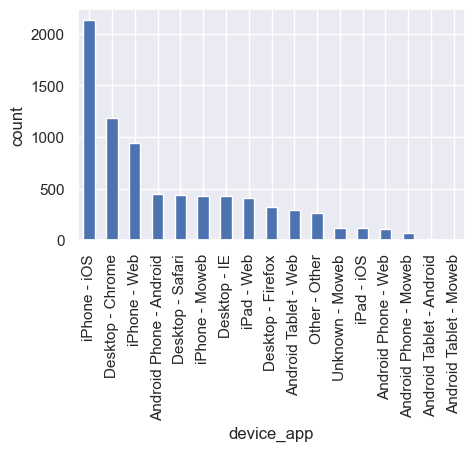

In [314]:
plt.figure(figsize=(5,3))
pd.value_counts(df['dim_device_app_combo']).plot.bar()
plt.ylabel('count')
plt.xlabel('device_app')
plt.show()

In [315]:
df['session_length'].value_counts()
#Important note: 3012 of the session_length are under a minute

session_length
0.0      3012
1.0       878
2.0       435
3.0       333
4.0       273
         ... 
142.0       1
143.0       1
307.0       1
178.0       1
396.0       1
Name: count, Length: 169, dtype: int64

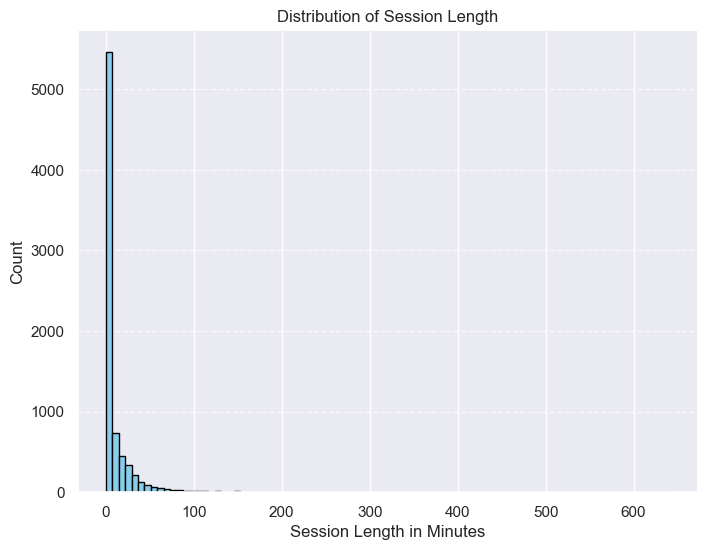

In [316]:
#Visualizing distribution of Session Length
plt.figure(figsize=(8, 6))

n_bins = int(np.sqrt(df.shape[0]))
plt.hist(df['session_length'], bins=n_bins, color='skyblue', edgecolor='black')

plt.title('Distribution of Session Length')
plt.xlabel('Session Length in Minutes')
plt.ylabel('Count')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [317]:
df.nunique()

id_visitor               630
id_session              7756
dim_session_number       702
dim_device_app_combo      17
ds                       349
did_search                 2
sent_message               2
sent_booking_request       2
session_length           169
dtype: int64

In [318]:
print(df['sent_booking_request'].value_counts())
print(df['sent_message'].value_counts())
print(df['did_search'].value_counts())

sent_booking_request
0    7611
1     145
Name: count, dtype: int64
sent_message
0    6477
1    1279
Name: count, dtype: int64
did_search
0    6520
1    1236
Name: count, dtype: int64


In [319]:
#Understanding the ratio breakdown of different user actions on Airbnb platform
def ratio(lst):
    yes = 0
    no = 0
    for n in lst:
        if n == 1:
            yes += 1
        else:
            no += 1
    return (round((yes / (no + yes))* 100, 1))
print("The booking rate is:", ratio(df['sent_booking_request']))
print("The message sent rate is:", ratio(df['sent_message']))
print("The search rate is:", ratio(df['did_search']))

The booking rate is: 1.9
The message sent rate is: 16.5
The search rate is: 15.9


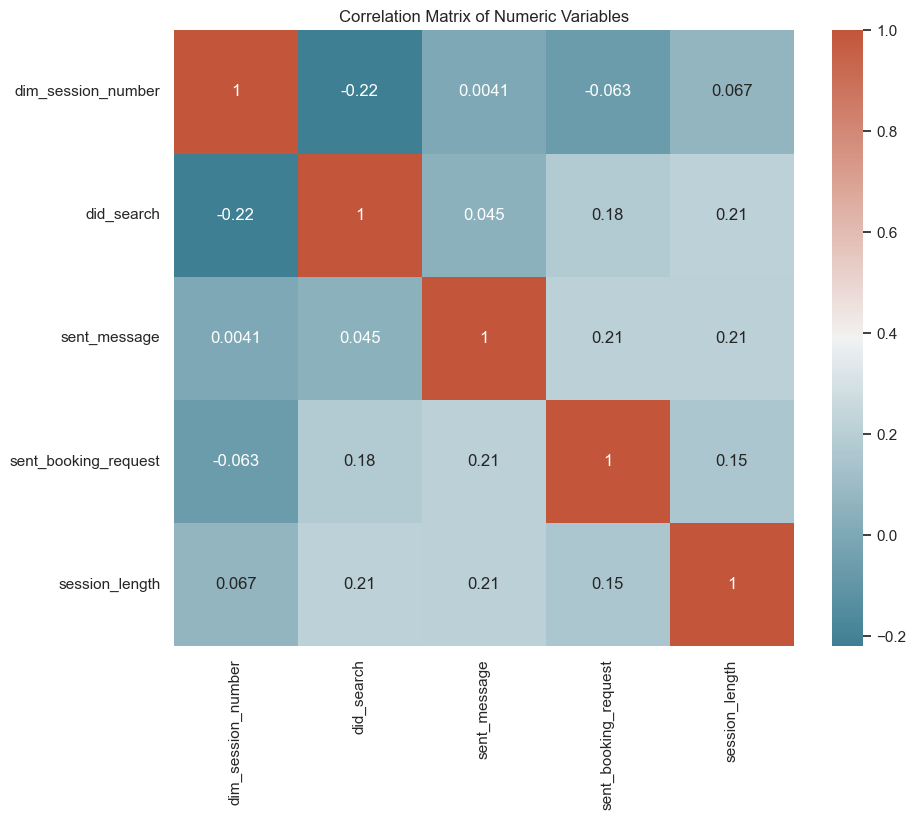

In [320]:
#Calculating the Correlation Matrix
# Select only numeric columns for correlation calculation
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculating the correlation matrix
corr = numeric_columns.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
plt.title('Correlation Matrix of Numeric Variables')
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

plt.show()

<Axes: ylabel='dim_device_app_combo'>

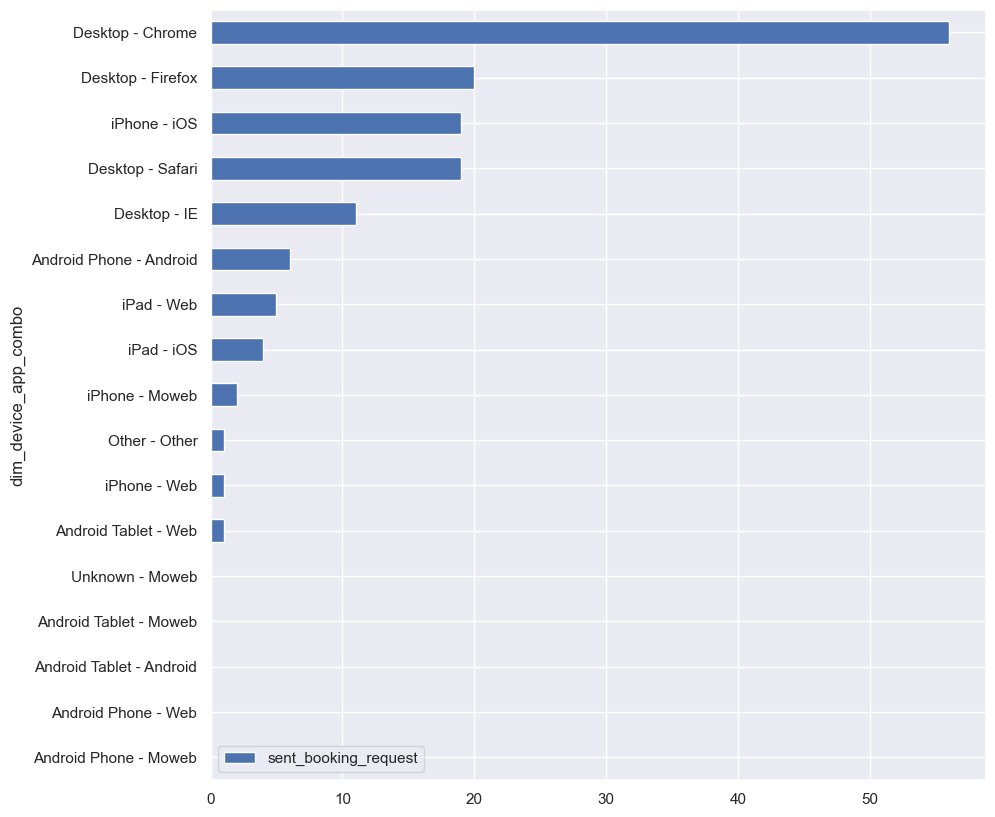

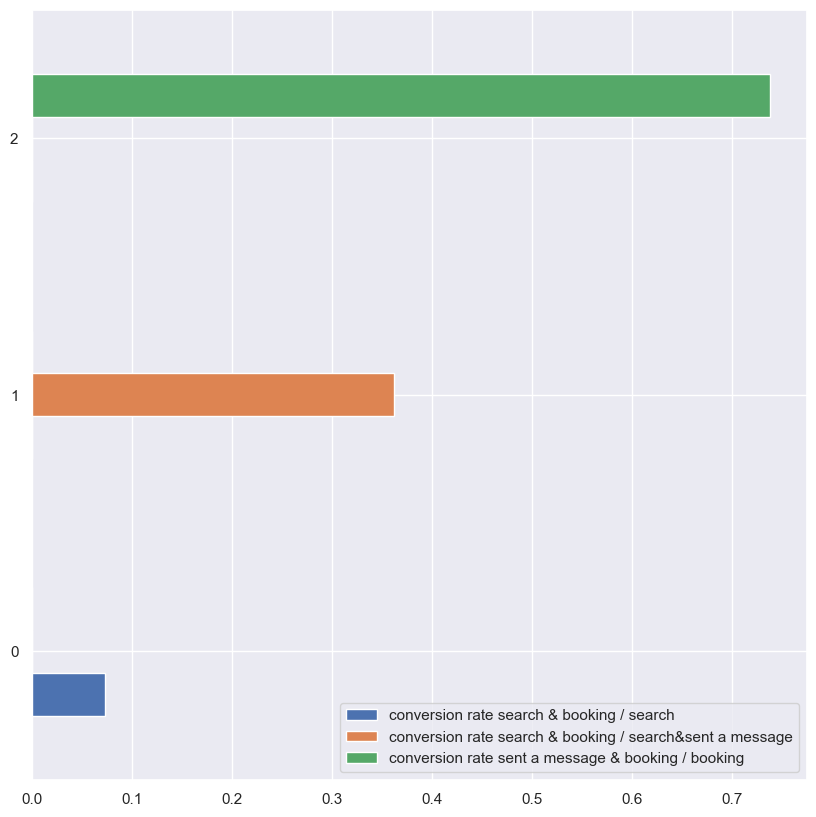

In [321]:
search=df[(df['did_search']==1)]
search_sent=df[(df['did_search']==1) & (df['sent_message']==1)]
sent_booking=df[(df['sent_booking_request']==1) & (df['sent_message']==1)]
search_booking=df[(df['did_search']==1) & (df['sent_booking_request']==1)]
booking=df[(df['sent_booking_request']==1)]

dicti=pd.DataFrame([{'conversion rate search & booking / search':search_booking.shape[0]/search.shape[0]},
       {'conversion rate search & booking / search&sent a message':search_booking.shape[0]/search_sent.shape[0]},
       {'conversion rate sent a message & booking / booking':sent_booking.shape[0]/booking.shape[0]}])
fig, ax = plt.subplots()
dicti.plot(kind='barh', figsize=(10,10))
ax.set_xlabel('Number of bookings')
df[['dim_device_app_combo','sent_booking_request']].groupby('dim_device_app_combo').sum().sort_values(by='sent_booking_request').plot(kind='barh', figsize=(10,10), ax=ax)

/var/folders/rn/gpncffpn2t7_b33d6gbxsjb80000gn/T/ipykernel_35719/3890545692.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(search["session_length"],fit_kws={'linewidth':5})
/var/folders/rn/gpncffpn2t7_b33d6gbxsjb80000gn/T/ipykernel_35719/3890545692.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns

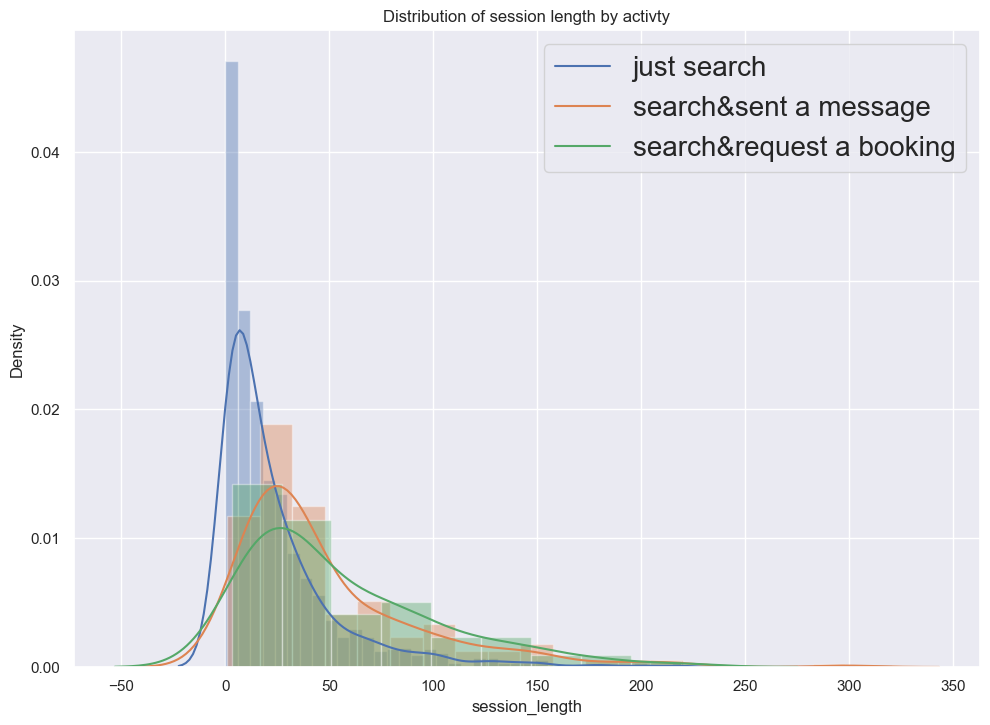

In [322]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(search["session_length"],fit_kws={'linewidth':5})
sns.distplot(search_sent["session_length"])
sns.distplot(search_booking["session_length"])
plt.legend(labels=['just search','search&sent a message','search&request a booking'],prop={'size': 20})
plt.title('Distribution of session length by activty')
plt.show()

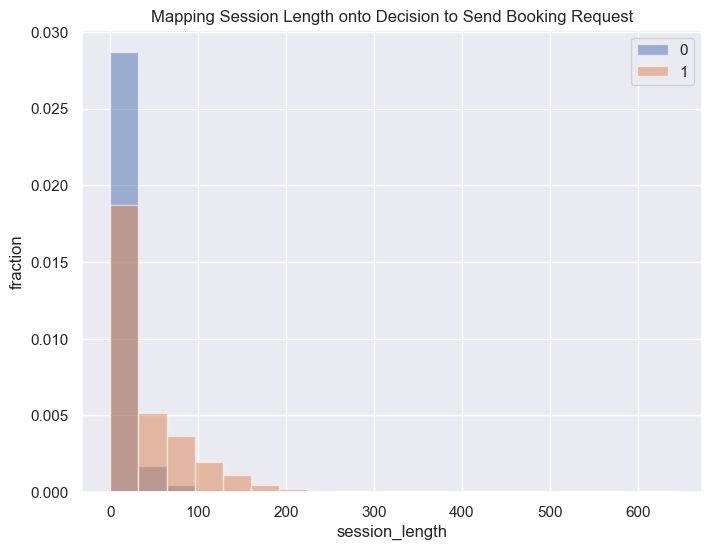

In [323]:
categories = df['sent_booking_request'].unique()
bin_range = (df['session_length'].min(),df['session_length'].max())

plt.figure(figsize=(8,6))

for c in categories:
    plt.hist(df[df['sent_booking_request']==c]['session_length'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.title('Mapping Session Length onto Decision to Send Booking Request')
plt.ylabel('fraction')
plt.xlabel('session_length')
plt.show()

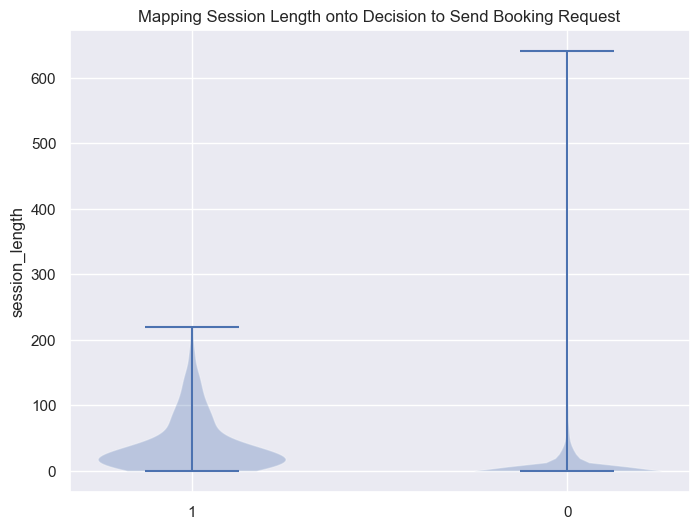

In [324]:
dataset = [df[df['sent_booking_request']== 1 ]['session_length'].values,
           df[df['sent_booking_request']== 0 ]['session_length'].values]

plt.figure(figsize=(8,6))

plt.violinplot(dataset = dataset)
plt.title('Mapping Session Length onto Decision to Send Booking Request')
plt.xticks([1,2],['1','0'])
plt.ylabel('session_length')
plt.show()

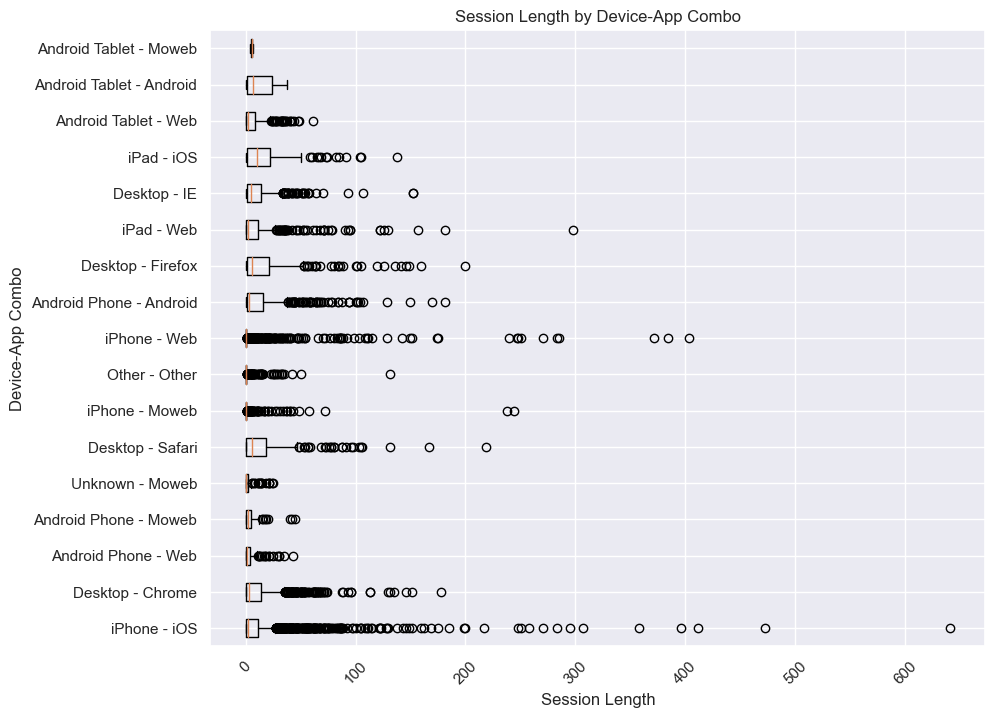

In [325]:
plt.figure(figsize=(10, 8))
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Create a boxplot for each category
categories = df['dim_device_app_combo'].unique()
boxplots = []

for category in categories:
    boxplots.append(df[df['dim_device_app_combo'] == category]['session_length'])

# Plot the horizontal boxplots
plt.boxplot(boxplots, vert=False, labels=categories)

# Add labels and title
plt.xlabel('Session Length')
plt.ylabel('Device-App Combo')
plt.title('Session Length by Device-App Combo')

plt.show()

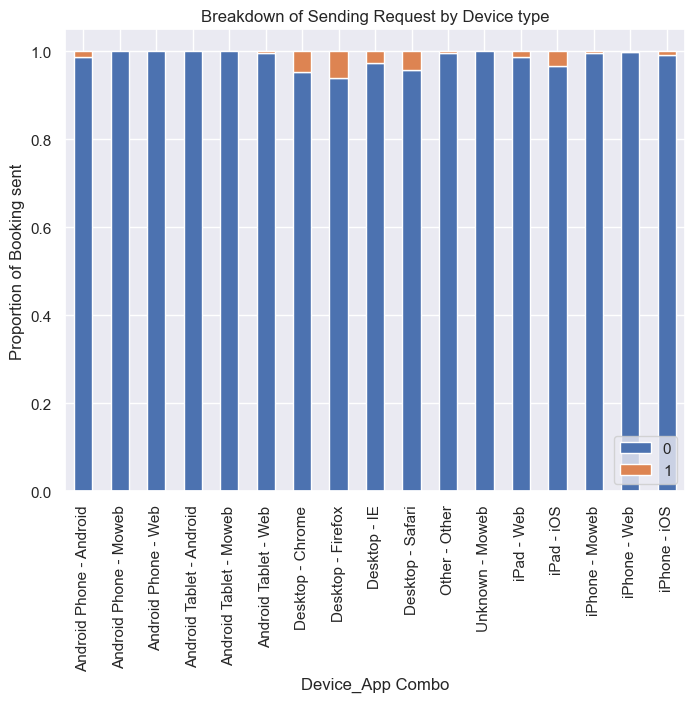

In [326]:
#Visualizing which type of devices had highest rates of sending booking request
count_matrix = df.groupby(['dim_device_app_combo','sent_booking_request']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)  #normalizing the count_matrix data for the bar plot

count_matrix_norm.plot(kind='bar', stacked=True,figsize=(8,6))
plt.title('Breakdown of Sending Request by Device type')
plt.ylabel('Proportion of Booking sent')
plt.xlabel('Device_App Combo')
plt.legend(loc=4)
plt.show()

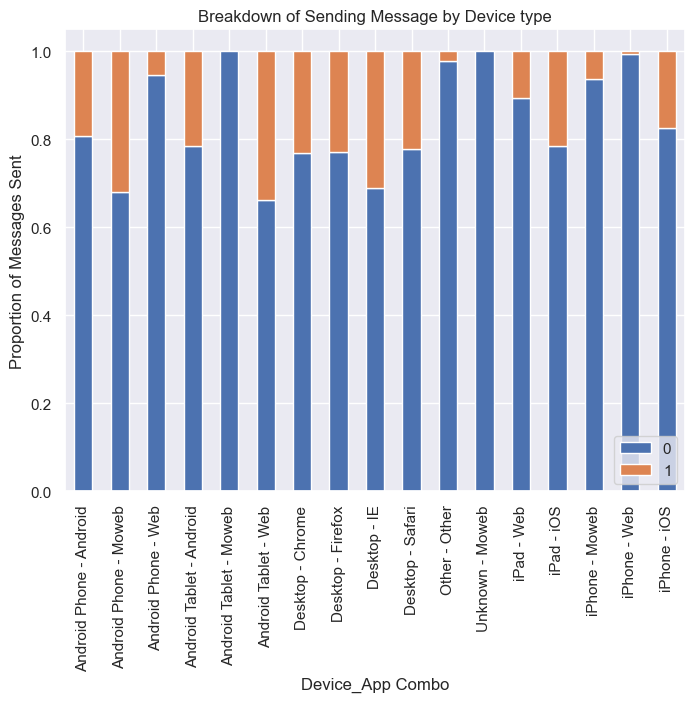

In [327]:
#Visualizing which type of devices had highest rates of sending message
count_matrix = df.groupby(['dim_device_app_combo','sent_message']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)  #normalizing the count_matrix data for the bar plot

count_matrix_norm.plot(kind='bar', stacked=True,figsize=(8,6))
plt.title('Breakdown of Sending Message by Device type')
plt.ylabel('Proportion of Messages Sent')
plt.xlabel('Device_App Combo')
plt.legend(loc=4)
plt.show()

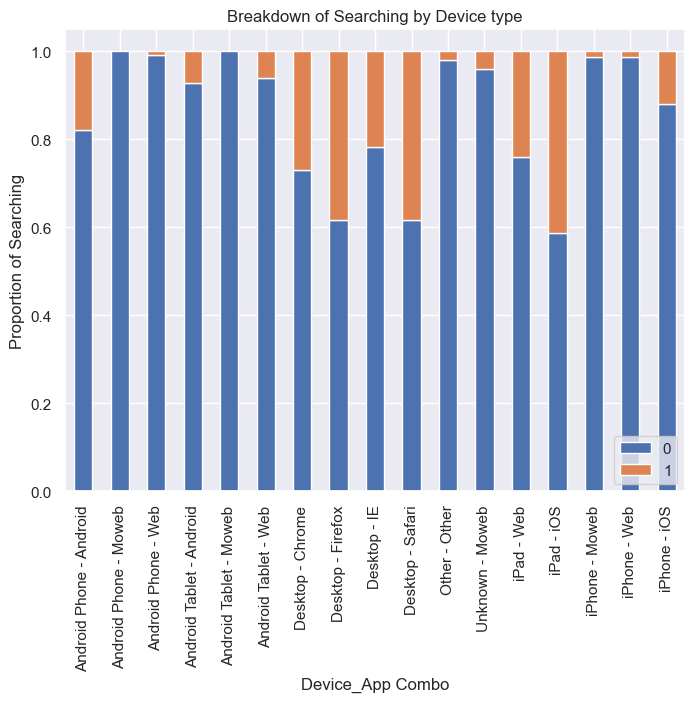

In [328]:
#Visualizing which type of devices had highest rates of searching
count_matrix = df.groupby(['dim_device_app_combo','did_search']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)  #normalizing the count_matrix data for the bar plot

count_matrix_norm.plot(kind='bar', stacked=True,figsize=(8,6))
plt.title('Breakdown of Searching by Device type')
plt.ylabel('Proportion of Searching')
plt.xlabel('Device_App Combo')
plt.legend(loc=4)
plt.show()

## Understanding individual user behavior ##

In [329]:
#Understand behavior of one user first (detect patterns)
first_user = df[df['id_visitor'] == 'ed1329a6-064d-47e9-93bc-93f5a50822df']
first_user.head()

,id_visitor,id_session,dim_session_number,dim_device_app_combo,ds,did_search,sent_message,sent_booking_request,session_length
0,ed1329a6-064d-47e9-93bc-93f5a50822df,a8dfb8ed5aa79e00ff14b2da297c9778,83,iPhone - iOS,2/16/15,0,0,0,23.0
1,ed1329a6-064d-47e9-93bc-93f5a50822df,950277daef16f86dc2c05d2b212eea81,84,Desktop - Chrome,2/18/15,0,0,0,15.0
2,ed1329a6-064d-47e9-93bc-93f5a50822df,ee4e2f99dd0c0bef2d40e4bdf880c862,85,Desktop - Chrome,2/18/15,0,0,0,3.0
3,ed1329a6-064d-47e9-93bc-93f5a50822df,59fbde7b5d35403116c461fa7fc1ab6e,86,Desktop - Chrome,2/18/15,0,0,0,10.0
4,ed1329a6-064d-47e9-93bc-93f5a50822df,ec8972a3c7256ea4dcba61ee2bd9e3a8,87,Desktop - Chrome,2/19/15,0,0,0,0.0


In [330]:
# Checking if all of users sessions are logged
session_numbers = first_user['dim_session_number'].tolist()
print(session_numbers)

[83, 84, 85, 86, 87, 88, 89, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]


In [331]:
first_user['sent_booking_request'].value_counts()

sent_booking_request
0    74
1    15
Name: count, dtype: int64

In [332]:
first_user['dim_device_app_combo'].value_counts()

dim_device_app_combo
Desktop - Chrome    76
iPhone - iOS        13
Name: count, dtype: int64

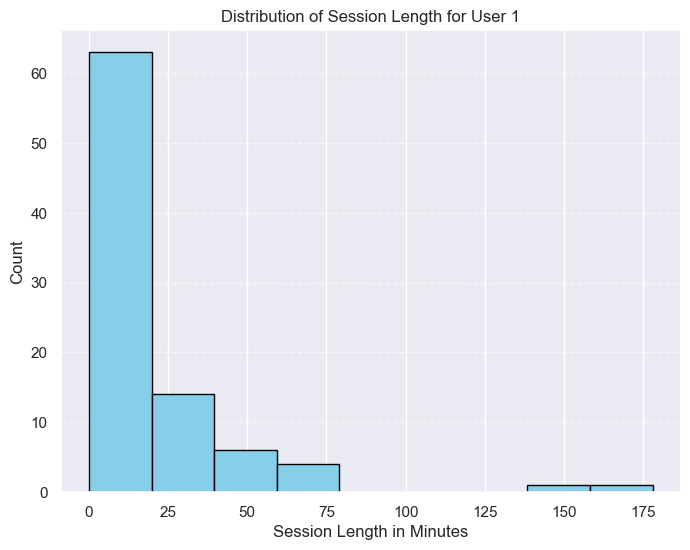

In [333]:
#Visualizing distribution of Session Length for User 1
plt.figure(figsize=(8, 6))

n_bins = int(np.sqrt(first_user.shape[0]))
plt.hist(first_user['session_length'], bins=n_bins, color='skyblue', edgecolor='black')

plt.title('Distribution of Session Length for User 1')
plt.xlabel('Session Length in Minutes')
plt.ylabel('Count')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


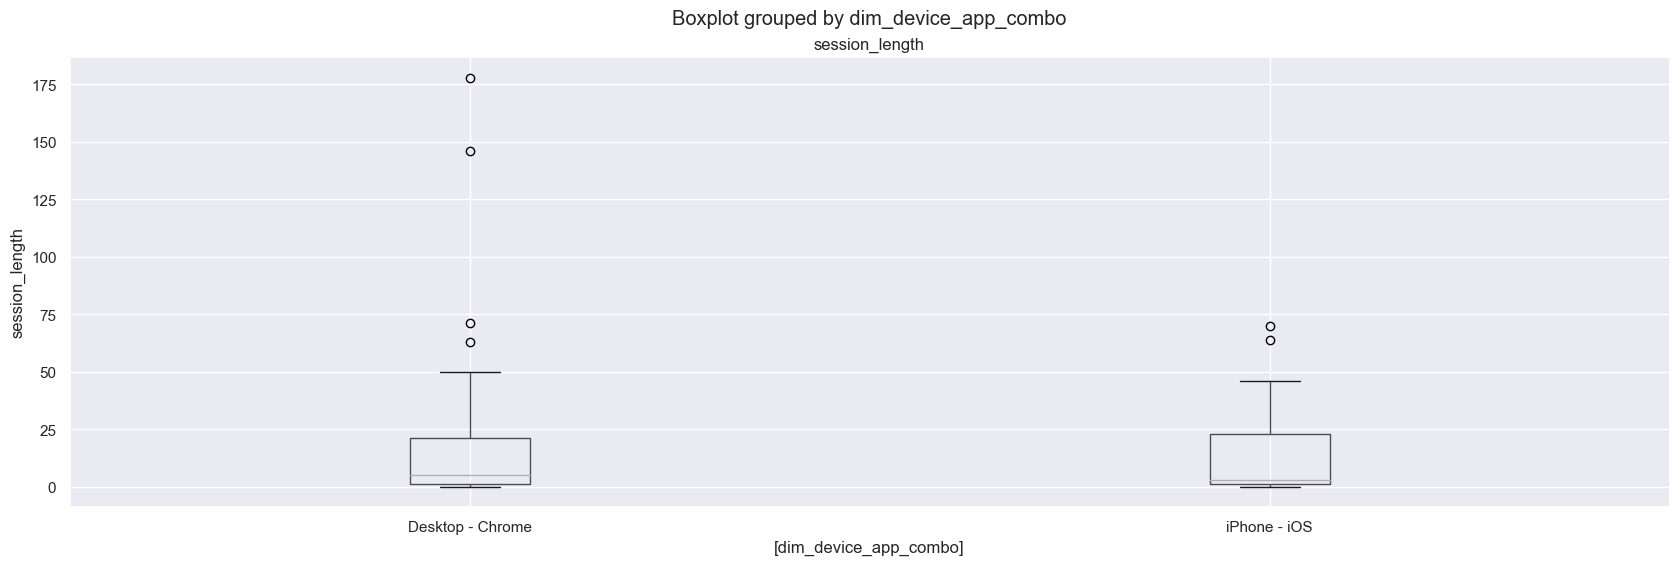

In [334]:
first_user[['session_length','dim_device_app_combo']].boxplot(by='dim_device_app_combo',figsize=(20,6))
plt.ylabel('session_length')
plt.show()

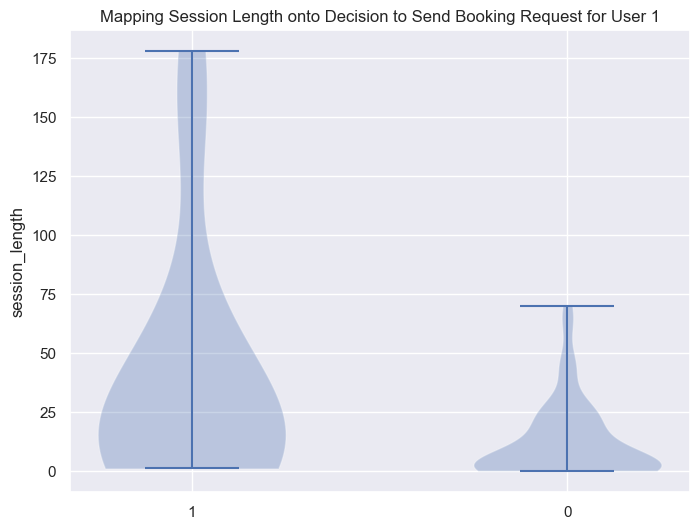

In [335]:
dataset = [first_user[first_user['sent_booking_request']== 1 ]['session_length'].values,
           first_user[first_user['sent_booking_request']== 0 ]['session_length'].values]

plt.figure(figsize=(8,6))

plt.violinplot(dataset = dataset)
plt.title('Mapping Session Length onto Decision to Send Booking Request for User 1')
plt.xticks([1,2],['1','0'])
plt.ylabel('session_length')
plt.show()

### Preprocessing

1. Preprocessing (non-iid data)
   
if you want to predict the outcome of a new user's interaction with platform:
- your test score must be based on users not included in training and validation
- your validation score must be based on users not included in training
- points of one user should not be distributed over multiple sets because your generalization error will be off

3. Missing values (dim_user_agent)

In [340]:
#Selecting the Y and X for splitting
y = df['sent_booking_request']
User_ID = df['id_visitor']
X = df.drop(columns=['id_visitor','id_session','ds','sent_booking_request']) 
classes, counts = np.unique(y,return_counts=True)     #finds number of classes and points in each class
print(classes, counts)
print('balance:',np.max(counts/len(y)))

[0 1] [7611  145]
balance: 0.9813047962867457


In [337]:
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import train_test_split 

random_state = 321
groups = User_ID
group_kfold = GroupKFold(n_splits=5)

for i, (train_index, test_index) in enumerate(group_kfold.split(X, y, groups)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}, group={groups[train_index]}")
    print(f"  Test:  index={test_index}, group={groups[test_index]}")
    
    # Using train_index and test_index to create training and test sets
    X_train, y_train = X.iloc[train_index], y.iloc[train_index]
    X_test, y_test = X.iloc[test_index], y.iloc[test_index]

    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=random_state)


Fold 0:
  Train: index=[   0    1    2 ... 7747 7748 7755], group=0       ed1329a6-064d-47e9-93bc-93f5a50822df
1       ed1329a6-064d-47e9-93bc-93f5a50822df
2       ed1329a6-064d-47e9-93bc-93f5a50822df
3       ed1329a6-064d-47e9-93bc-93f5a50822df
4       ed1329a6-064d-47e9-93bc-93f5a50822df
                        ...                 
7745             1423000136_QEpynk40vlyS2yav
7746             1423000136_QEpynk40vlyS2yav
7747             1387877243_s8/QmUxw28xqrUKs
7748             1404163885_oAFxvb+vpzXVihBX
7755             1416012256_dB6ft6mhjVRXX48c
Name: id_visitor, Length: 6204, dtype: object
  Test:  index=[ 272  273  274 ... 7752 7753 7754], group=272     2ec41206-3c49-4841-91c1-9f4deed80a89
273     2ec41206-3c49-4841-91c1-9f4deed80a89
274     2ec41206-3c49-4841-91c1-9f4deed80a89
275     2ec41206-3c49-4841-91c1-9f4deed80a89
276     2ec41206-3c49-4841-91c1-9f4deed80a89
                        ...                 
7750             1414271365_EuFmeZ+vsDuryP8F
7751             141

As we are trying to predict if a new user will send a booking request in this question, our target variable is "sent_booking_request" which represents if someone sent the booking request (1) or did not (0). Since the data is obtained from different subjects with several samples per-subject, we need the model to be flexible enough to learn from highly specific features and avoid failing to generalize to new subjects. In effect, GroupKFold allows us to control for overfitting be making sure that each subject is in a different testing fold, and the same group is not represented in both testing and training sets. Additionally, because of the imbalance in the data (there are more samples for certain users than others), each fold will not be exactly the same size. 

GroupKFold is a variation of k-fold which ensures that the same group is not represented in both testing/validation and training sets. For example if the data is obtained from different subjects with several samples per-subject and if the model is flexible enough to learn from highly person specific features it could fail to generalize to new subjects. GroupKFold makes it possible to detect this kind of overfitting situations.

# Preprocessing
For missing data, we'll just drop the column for dim_user_agent

In [338]:
first_user.head()

,id_visitor,id_session,dim_session_number,dim_device_app_combo,ds,did_search,sent_message,sent_booking_request,session_length
0,ed1329a6-064d-47e9-93bc-93f5a50822df,a8dfb8ed5aa79e00ff14b2da297c9778,83,iPhone - iOS,2/16/15,0,0,0,23.0
1,ed1329a6-064d-47e9-93bc-93f5a50822df,950277daef16f86dc2c05d2b212eea81,84,Desktop - Chrome,2/18/15,0,0,0,15.0
2,ed1329a6-064d-47e9-93bc-93f5a50822df,ee4e2f99dd0c0bef2d40e4bdf880c862,85,Desktop - Chrome,2/18/15,0,0,0,3.0
3,ed1329a6-064d-47e9-93bc-93f5a50822df,59fbde7b5d35403116c461fa7fc1ab6e,86,Desktop - Chrome,2/18/15,0,0,0,10.0
4,ed1329a6-064d-47e9-93bc-93f5a50822df,ec8972a3c7256ea4dcba61ee2bd9e3a8,87,Desktop - Chrome,2/19/15,0,0,0,0.0


For binary variables used as features in a machine learning model("did_search","sent_message","sent_booking_request", you can directly use the 0 and 1 values without any additional encoding or scaling. Label encoding and standard scaling are more relevant for other types of variables, such as categorical variables with multiple categories or continuous numerical variables.

In [344]:
# collect which encoder to use on each feature
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
# needs to be done manually
onehot_ftrs = ['dim_device_app_combo'] #categorical variable but no need to order
minmax_ftrs = ['dim_session_number']  #continuous variable that is reasonably bounded
std_ftrs = ['session_length']     #continuous feature that follows a tailed distribution

# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('std', StandardScaler(), std_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)]) 

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

print(X_train.shape)
print(X_train_prep.shape)
print(X_train_prep)


(4964, 5)
(4964, 18)
[[ 0.          0.          0.         ...  0.          0.04422254
  -0.36506741]
 [ 0.          0.          0.         ...  1.          0.06419401
   0.59399125]
 [ 0.          0.          0.         ...  1.          0.07845934
   1.02023954]
 ...
 [ 0.          0.          0.         ...  0.          0.
  -0.32954672]
 [ 0.          0.          0.         ...  0.          0.09700428
   0.06118088]
 [ 0.          0.          0.         ...  0.          0.00998573
  -0.4005881 ]]


/Users/maxboucher/anaconda3/envs/data1030/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
